In [3]:
#mix all the data together

import random
random.seed(122)

import csv
import pandas as pd
import numpy as np
import xgboost as xgb
import time

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report, confusion_matrix  
from sklearn import metrics
from sklearn.model_selection import train_test_split

from numpy import loadtxt
from xgboost import XGBClassifier
from xgboost import plot_importance
from xgboost import DMatrix
from matplotlib import pyplot
from math import *

with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
    
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0

frames = [features, features2]

features = pd.concat(frames) 

# #shuffle dataframe
# features = features.sample(frac=1).reset_index(drop=True)
# features2 = features2.sample(frac=1).reset_index(drop=True)

# # Labels are the values we want to predict
# train_labels = np.array(features['label'])
# test_labels = np.array(features2['label'])
# # Remove the labels from the features
# # axis 1 refers to the columns
# train_features= features.drop('label', axis = 1)
# test_features= features2.drop('label', axis = 1)
# # Saving feature names for later use
# feature_list = list(train_features.columns)
# # Convert to numpy array
# train_features = np.array(train_features)
# test_features = np.array(test_features)

# Labels are the values we want to predict
labels = np.array(features['label'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(features.columns)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")


(0.29, ' seconds elapsed')


(25.77, ' seconds elapsed')
[[   0    0    0]
 [   2 7396  755]
 [   0  667 7445]]


/home/bwjoyce/.local/lib/python2.7/site-packages/sklearn/metrics/classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.92      0.91      0.91      8153
         1.0       0.91      0.92      0.91      8112

   micro avg       0.91      0.91      0.91     16265
   macro avg       0.61      0.61      0.61     16265
weighted avg       0.91      0.91      0.91     16265

('Accuracy:', 0.9124500461112819)


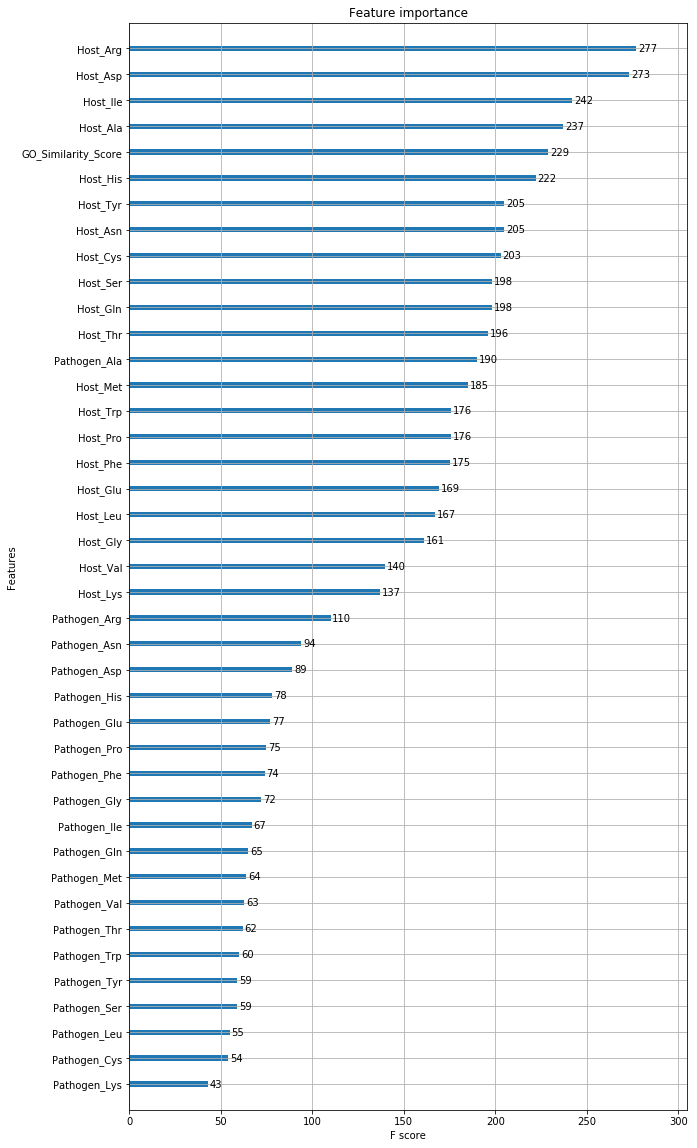

In [4]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [5]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 1000 decision trees  
#-  1 tree had Accuracy:    81.01%. and took 1 sec.
# - 10 trees had Accuracy:  89.27%. and took 10 sec.
# - 100 trees had Accuracy: 90.87%. and took 102 sec.
# - 500 trees had Accuracy: 90.76%. and took 483 sec.
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



('Accuracy:', 0.0, '%.')
(153.17, ' seconds elapsed')
[[7408  745]
 [ 817 7295]]
              precision    recall  f1-score   support

           0       0.90      0.91      0.90      8153
           1       0.91      0.90      0.90      8112

   micro avg       0.90      0.90      0.90     16265
   macro avg       0.90      0.90      0.90     16265
weighted avg       0.90      0.90      0.90     16265

('Accuracy:', 0.9039655702428527)
Variable: GO_Similarity_Score  Importance: 0.19
Variable: Host_Arg             Importance: 0.11
Variable: Host_Ile             Importance: 0.05
Variable: Host_Asp             Importance: 0.04
Variable: Host_Cys             Importance: 0.03
Variable: Host_Glu             Importance: 0.03
Variable: Host_Tyr             Importance: 0.03
Variable: Host_Ala             Importance: 0.02
Variable: Host_Asn             Importance: 0.02
Variable: Host_Gln             Importance: 0.02
Variable: Host_Gly             Importance: 0.02
Variable: Host_His            

In [6]:
#just mix 30% of the trainging data into the validation data


with open('ml_features_201710.csv','rb') as data:
    features = pd.read_csv(data)
    
with open('crg123.csv','rb') as data2:
    features2 = pd.read_csv(data2)
      
   
start = time.time()  

features=features.rename(columns = {'interact':'label'})
features2=features2.rename(columns = {'interact':'label'})

#convert labels to boolean values
features.loc[features['label']=='YES','label']=1
features.loc[features['label']=='NO','label']=0

features2.loc[features2['label']=='YES','label']=1
features2.loc[features2['label']=='NO','label']=0



# #shuffle dataframe
features = features.sample(frac=1).reset_index(drop=True)
features2 = features2.sample(frac=1).reset_index(drop=True)

#split into 70% and 30% and add the 30% into the validation/features2 dataset
features, addToValidation = train_test_split(features, test_size=0.3)

frames = [addToValidation,features2]

features2 = pd.concat(frames) 

#shuffle dataframe again
features2 = features2.sample(frac=1).reset_index(drop=True)


# Labels are the values we want to predict
train_labels = np.array(features['label'])
test_labels = np.array(features2['label'])
# Remove the labels from the features
# axis 1 refers to the columns
train_features= features.drop('label', axis = 1)
test_features= features2.drop('label', axis = 1)
# Saving feature names for later use
feature_list = list(train_features.columns)
# Convert to numpy array
train_features = np.array(train_features)
test_features = np.array(test_features)

#Using Skicit-learn to split data into training and testing sets

# Split the data into training and testing sets
#train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.30, random_state = 42)
end = time.time()

print(round(end - start,2)," seconds elapsed")

(0.16, ' seconds elapsed')


(13.48, ' seconds elapsed')
[[   0    0    0]
 [   2 7407  836]
 [   0  702 7677]]
              precision    recall  f1-score   support

        -1.0       0.00      0.00      0.00         0
         0.0       0.91      0.90      0.91      8245
         1.0       0.90      0.92      0.91      8379

   micro avg       0.91      0.91      0.91     16624
   macro avg       0.61      0.60      0.60     16624
weighted avg       0.91      0.91      0.91     16624

('Accuracy:', 0.9073628488931665)


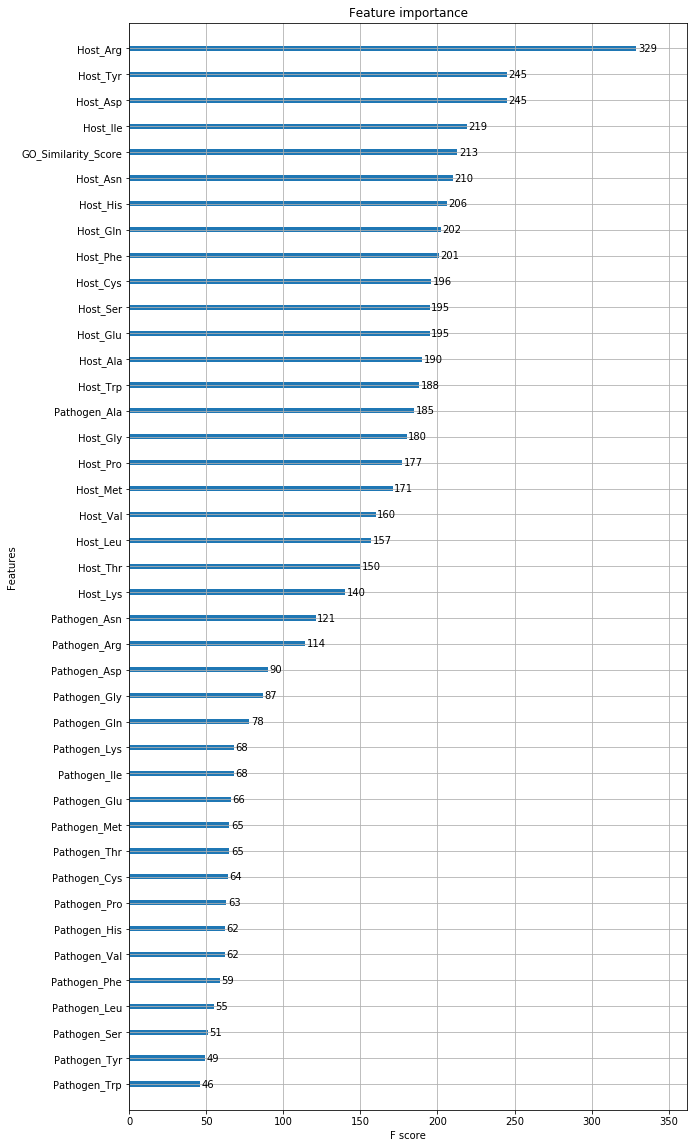

In [7]:
#source https://xgboost.readthedocs.io/en/latest/get_started.html
start = time.time()

dtrain = DMatrix(train_features,label=train_labels,feature_names=feature_list)
dtest = DMatrix(test_features,label=test_labels,feature_names=feature_list)
# specify parameters via map
#param = {'max_depth':2, 'eta':1, 'silent':1, 'objective':'binary:logistic' }
param = {'silent':1}
num_round = 100
bst = xgb.train(param, dtrain, num_round)
# make prediction
predictions = bst.predict(dtest)

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))


# plot feature importance
#refference https://machinelearningmastery.com/feature-importance-and-feature-selection-with-xgboost-in-python/
fig, ax = pyplot.subplots(figsize=(10,20))
plot_importance(bst, ax=ax)
pyplot.show()

In [8]:
#random forest.  Source Link: https://towardsdatascience.com/random-forest-in-python-24d0893d51c0 and https://www.datacamp.com/community/tutorials/random-forests-classifier-python
start = time.time() 

from numpy import loadtxt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Instantiate model with 1000 decision trees  
#-  1 tree had Accuracy:    81.01%. and took 1 sec.
# - 10 trees had Accuracy:  89.27%. and took 10 sec.
# - 100 trees had Accuracy: 90.87%. and took 102 sec.
# - 500 trees had Accuracy: 90.76%. and took 483 sec.
rf = RandomForestRegressor(n_estimators = 100, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);


# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

#calcualte the accuracy
accuracy = sum(predictions.round() == test_labels)/test_labels.size
# Print out the Accuracy
print('Accuracy:', 100*round(accuracy, 4), '%.')

end = time.time()

print(round(end - start,2)," seconds elapsed")


print(confusion_matrix(test_labels,predictions.round()))  
print(classification_report(test_labels,predictions.round()))  


# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(test_labels,predictions.round()))

# Get numerical feature importances
importances = list(rf.feature_importances_)
# List of tuples with variable and importance
feature_importances = [(feature, round(importance, 2)) for feature, importance in zip(feature_list, importances)]
# Sort the feature importances by most important first
feature_importances = sorted(feature_importances, key = lambda x: x[1], reverse = True)
# Print out the feature and importances 
for pair in feature_importances:
    print("Variable: {:20} Importance: {}".format(*pair))



('Accuracy:', 0.0, '%.')
(153.66, ' seconds elapsed')
[[7405  840]
 [ 865 7514]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      8245
           1       0.90      0.90      0.90      8379

   micro avg       0.90      0.90      0.90     16624
   macro avg       0.90      0.90      0.90     16624
weighted avg       0.90      0.90      0.90     16624

('Accuracy:', 0.8974374398460058)
Variable: GO_Similarity_Score  Importance: 0.19
Variable: Host_Arg             Importance: 0.12
Variable: Host_Ile             Importance: 0.05
Variable: Host_Asp             Importance: 0.04
Variable: Host_Cys             Importance: 0.03
Variable: Host_Glu             Importance: 0.03
Variable: Host_His             Importance: 0.03
Variable: Host_Tyr             Importance: 0.03
Variable: Pathogen_Ala         Importance: 0.02
Variable: Pathogen_Asn         Importance: 0.02
Variable: Pathogen_Pro         Importance: 0.02
Variable: Host_Ala            